# TYPES OF TRAINING MODELS

## <span style="color:green">1. Linear Regression</span>

**Linear Regression Model**

$ y = h_b(x) = b \cdot x $

**Equation of the Mean Sum of Squared Errors**

$ MSE(b) = \frac{1}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)^2$

**Normal Equation**

$ \hat{b} = (x^Tx)^{-1} x^T y $

#### <span style="color:blue"> 1.1 Normal Equation </span>

In [45]:
# Import the libraries: numpy, matplotlib, pandas
# Numpy is the quintessential mathematics library for Python
import numpy as np

# Import matplotlib because we will be creating graphs
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
# Generate the toy set of random linear data 
x = np.random.rand(100,1)

# Generate a vector of values that you will be predicting (add a randomness factor)
y = 3 + 3*x + np.random.rand(100,1)

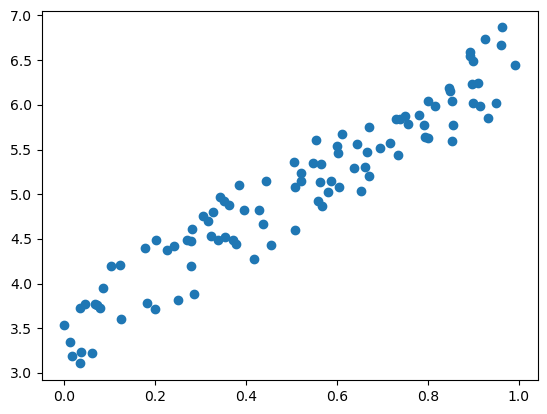

In [47]:
# Plot the toy dataset
plt.scatter(x,y)
plt.show()

In [48]:
# Add the value of x0
x_b = np.c_[np.ones((100,1)),x]
# Apply the normal equation 
# dot() = Dot product
param = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
# Visualize 
param

array([[3.4955856 ],
       [3.02613153]])

Here they won't have the same data as me; it's normal due to random factors.

The first value of the matrix is the slope, and the second is the intercept.

In [49]:
# Test these data with a test vector
x_new = np.array([[0],[1]])

In [50]:
# Add X0=1
x_new_b = np.c_[np.ones((2,1)),x_new]

In [51]:
# Make predictions using the normal equation
y_pred = x_new_b.dot(param)
y_pred

array([[3.4955856 ],
       [6.52171713]])

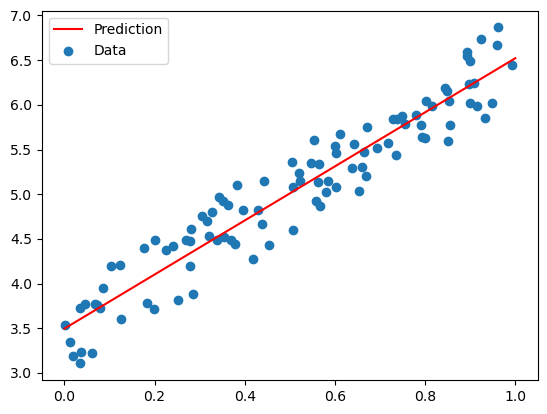

In [52]:
# Plot the regression with the original data and the prediction
plt.plot(x_new,y_pred,"r-",label="Prediction")
plt.scatter(x,y,label="Data")
plt.legend()
plt.show()

#### <span style="color:blue"> 1.2 Linear Regression from Scikit-learn </span>

In [53]:
# Perform regression using scikit 
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(x,y)

# Calculate the intercept and slope using this method
reg_lin.intercept_,reg_lin.coef_

(array([3.4955856]), array([[3.02613153]]))

In [54]:
intercept = float(reg_lin.intercept_[0])
coefficient = float(reg_lin.coef_[0][0])

print("Intercept:", intercept)
print("Coefficient:", coefficient)

Intercept: 3.4955855965931146
Coefficient: 3.0261315328418483


The parameters are the same as those obtained in the previous method. In this case, you would need to evaluate the computational cost of each method on your computer. 

***

## <span style="color:green">2. Gradient Descent</span>

Optimization algorithm. It signifies an alternative to the normal equation.

#### <span style="color:blue"> 2.1 Batch Gradient Descent</span>

**Partial derivative of the cost function (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Gradient vector of the cost function** 

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Gradient descent step**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [55]:
# Define the learning rate (ra)
ra = 0.1

# Define the iterations. 1000 is a standard. It will stop at 1000
iterations = 1000

# Number of data points 
m = 100

# Initialize the slope 
b = np.random.rand(2,1)

In [56]:
# Implement the program for gradient descent
for iteration in range(iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(b)-y)
    # Linear algebra expression for least squares (cost function)
    b = b - ra * gradients
b

array([[3.49558635],
       [3.02613014]])

The results give us extremely close values to those obtained with the normal equation. Note: remember that gradient descent is an approximation method.

**Repeat the exercise but with a different learning rate**

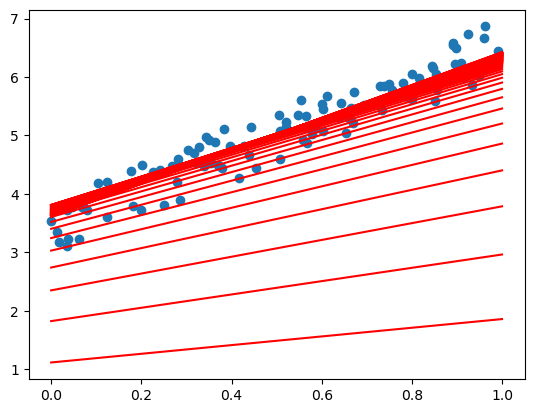

array([[3.61074055],
       [2.8139567 ]])

In [57]:
# Define the learning rate (ra)
ra = 0.1

# Define the iterations. 1000 is a standard. It will stop at 1000
iterations = 100

# Number of data points
m = 100

# Initialize the slope 
b = np.random.rand(2,1)

# Visualize the models being proposed until reaching the final prediction 
plt.scatter(x,y,label = "Data")

for iteration in range(iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(b)-y)
    # Linear algebra expression for least squares (cost function)
    b = b - ra * gradients
    y_new = x_new_b.dot(b)
    plt.plot(x_new,y_new,"r-")
plt.show()
b

**Ejercicio**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch 

***

#### <span style="color:blue"> 2.2 Stochastic Gradient Descent</span>

Due to the high computational complexity of batch gradient descent, we can consider stochastic gradient descent to improve the predictions

**Advantages:** You can work with more data, it escapes local minima.
**Disadvantages:**: It is not as accurate as other methods. However, the variation is negligible.

In [58]:
# epochs: how many gradients it will perform, how many data points it will select to compute the gradient
epochs = 50
# Learning schedule: used to define the learning rate
t0 , t1 = 5, 50
m = 100
# Define the learning schedule
def learning_schedule(t):
    return t0 / (t + t1)
# Define the two initial values
b = np.random.rand(2,1)

# Define the function 
for epoch in range(epochs):
    for i in range(m):
        # Generate a random index
        random_index = np.random.randint(m)
        # x value of the randomly selected coordinate
        xi = x_b[random_index:random_index+1]
        # y value of the randomly selected coordinate
        yi = y[random_index:random_index+1]
        # Compute the gradient (result of the partial derivative)
        gradients  = 2 * xi.T.dot(xi.dot(b) - yi)
        # Compute the learning rate
        ra = learning_schedule(epoch * m + i)
        # Calculate the intercept and slope parameters 
        b = b -ra * gradients
b

array([[3.52140969],
       [2.98869393]])

Although there is variation with the results of the previous methods, the difference is minimal

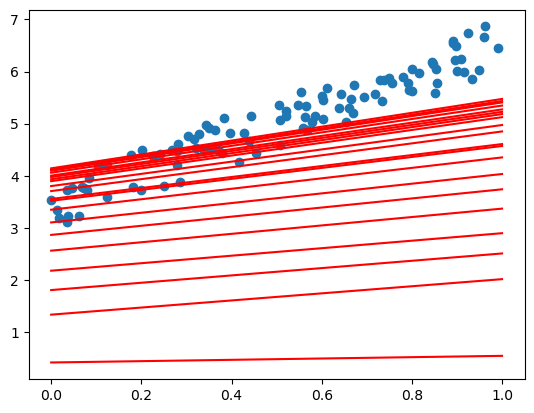

In [59]:
# Repeat the exercise but display each gradient performed. 
epochs = 4
t0 , t1 = 5, 50
m = 5

def learning_schedule(t):
    return t0 / (t + t1)

b = np.random.rand(2,1)
# Add a scatter plot to visualize the data 
plt.scatter(x,y,label="Data")

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        y_new = x_new_b.dot(b)
        # Plot the red lines representing the different gradients throughout the iterations 
        plt.plot(x_new,y_new,"r-")
        gradients  = 2 * xi.T.dot(xi.dot(b) - yi)
        ra = learning_schedule(epoch * m + i)
        b = b -ra * gradients
plt.show()

In [60]:
# Do it with scikit-learn
from sklearn.linear_model import SGDRegressor
# Tolerance is the threshold below the value of the sum of squared errors 
sgd = SGDRegressor(max_iter = 5000, tol = 1e-3, penalty = None, eta0 = .1)
#.ravel: it generates a flat list
sgd.fit(x, y.ravel())
# Extract the parameters, the intercept, and the slope 
sgd.intercept_,sgd.coef_

inter_sgd = float(sgd.intercept_[0])
coef_sgd = float(sgd.coef_[0])

print("Intercept:", inter_sgd)
print("Coefficient:", coef_sgd)

Intercept: 3.584999392898668
Coefficient: 2.8753334185451274


In [61]:
# Visualize the flattened list it generates .ravel
y.ravel()

array([4.37797908, 4.75498718, 4.60498128, 5.08251463, 3.77055825,
       3.60025074, 5.46784094, 4.59587788, 4.70119415, 4.92194239,
       6.22780451, 4.86858028, 3.72418423, 5.84369309, 3.77623674,
       6.44836192, 4.79773473, 5.64397813, 5.07520353, 4.41601537,
       4.48628128, 5.45888313, 5.53424401, 6.046027  , 5.62882217,
       5.29386996, 3.3486485 , 5.10783722, 5.67896785, 5.14538203,
       3.94676913, 4.92411921, 4.48808582, 4.194463  , 5.57087883,
       3.22649109, 6.49348197, 4.82326915, 3.1053144 , 5.59016076,
       6.24320228, 3.75764398, 5.02503584, 6.18941315, 5.35127477,
       6.15304226, 3.72187244, 4.20162577, 4.6685563 , 4.20826317,
       5.98179884, 5.77082687, 5.2049363 , 6.54731452, 4.48460133,
       3.78558447, 5.35614439, 4.4361466 , 5.15058656, 5.89146664,
       4.43886568, 5.51369374, 6.73624312, 4.39653373, 5.99119475,
       4.52239343, 6.8657041 , 4.48442609, 4.48123478, 4.53383791,
       6.66674464, 5.14246205, 3.53697024, 5.8726425 , 6.02085

With this method, there was a significant variation in the results obtained. It's a matter of judgment whether to sacrifice accuracy for computational cost or vice versa.

***

## <span style="color:green">3. Polynomial regression</span>

Polynomial regression is a linear regression to which we add equations with higher powers.

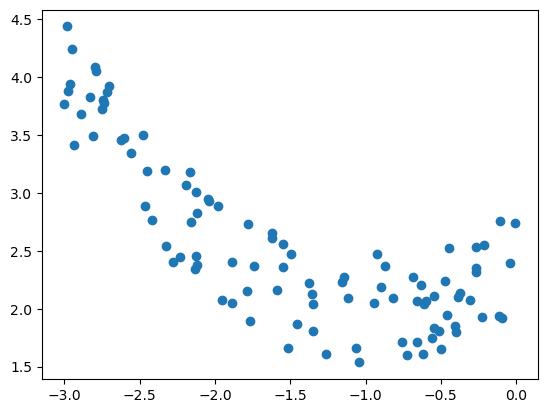

In [62]:
# Generate a toy dataset. Add a touch of randomness
m = 100
x = 3*np.random.rand(m,1)-3
# Square the equation
y = 2 + x + .5*x**2 + np.random.rand(m,1)
# Plot the dataset 
plt.scatter(x,y)

There isn't a specific function in scikit-learn for polynomial regression per se. However, we can use **PolynomialFeatures**, which takes the values of x and raises them to a specified power

In [63]:
# Import PolynomialFeatures with a degree of 2
from sklearn.preprocessing import PolynomialFeatures
poli = PolynomialFeatures(degree=2, include_bias=False)
x_poli = poli.fit_transform(x)
x[0], x_poli[0]

(array([-2.98172956]), array([-2.98172956,  8.89071119]))

In [64]:
# Perform a linear regression on the data
reg_lin = LinearRegression()
reg_lin.fit(x_poli,y)
reg_lin.intercept_, reg_lin.coef_
inter_reg = float(reg_lin.intercept_[0])
coef_reg_x = float(reg_lin.coef_[0][0])
coef_reg_x2 = float(reg_lin.coef_[0][1])

print("Intercept:", inter_reg)
print("Coefficient:", coef_reg_x)
print("Coefficient x2:", coef_reg_x2)

Intercept: 2.381517755020251
Coefficient: 0.9027322340137043
Coefficient x2: 0.49607218928602687


First, the intercept data appears, followed by the coefficients of x and x², respectively

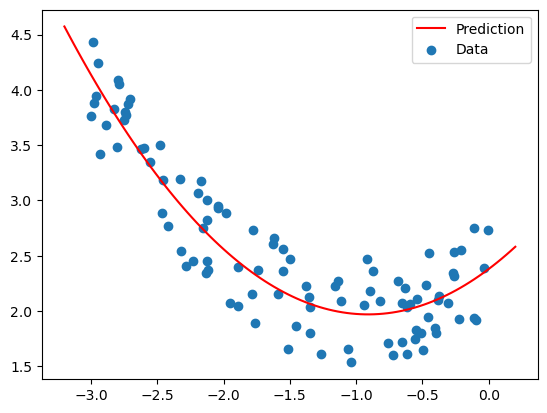

In [65]:
# Plot the prediction from PolynomialFeatures and the original data
x_new = np.linspace(-3.2,0.2,100)
# Write the formula from the array above
y_new = inter_reg + coef_reg_x*x_new + coef_reg_x2*x_new**2
plt.plot(x_new,y_new,"r-",label= "Prediction")
plt.scatter(x,y,label="Data")
plt.legend()
plt.show()

**Exercise**: Calculate the sum of squared errors and compare it with a linear prediction

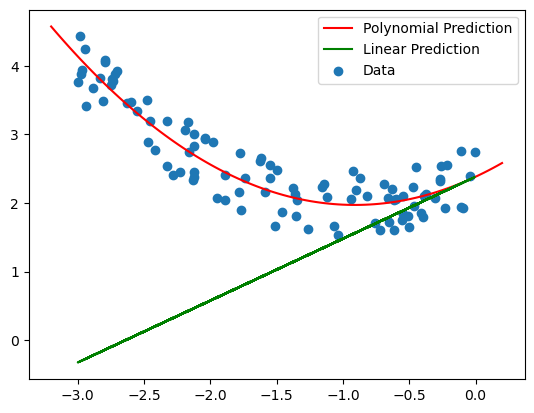

Sum of squared errors for linear prediction: 457.3390558044064


In [66]:
# Fit Linear Regression
reg_lin = LinearRegression()
reg_lin.fit(x_poli, y)

# Get coefficients from linear regression
intercept_lin = reg_lin.intercept_[0]
coef_lin = reg_lin.coef_[0][0]

# Prepare linear prediction
y_pred_lin = intercept_lin + coef_lin * x

# Calculate sum of squared errors for linear prediction
squared_errors = np.sum((y - y_pred_lin)**2)

# Plot PolynomialFeatures prediction and original data
plt.plot(x_new, y_new, "r-", label="Polynomial Prediction")
plt.plot(x, y_pred_lin, "g-", label="Linear Prediction")
plt.scatter(x, y, label="Data")
plt.legend()
plt.show()

# Print sum of squared errors for linear prediction
print(f"Sum of squared errors for linear prediction: {squared_errors}")

***

## <span style="color:green">4. Learning Curves</span>

In [67]:
# Import mean_squared_error and train_test_split to measure the error on the training and validation data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curves(model, x, y):
    # Start by splitting the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    # Generate an empty list to fill in as errors are calculated
    train_error, val_errors = [], []
    # Take the training set and fit it to the model with only one training data point and so on
    for m in range(1,len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        # Predict the model
        y_train_pred = model.predict(x_train[:m])
        # Predict the model
        y_val_predict = model.predict(x_val)
        # Calculate the errors
        train_error.append(mean_squared_error(y_train[:m],y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    # Plot them
    plt.plot(np.sqrt(train_error), "r-+", label = "Training set")
    plt.plot(np.sqrt(val_errors), "b-", label = "Validation set")
    plt.axis([0,80,0,2])
    plt.legend()

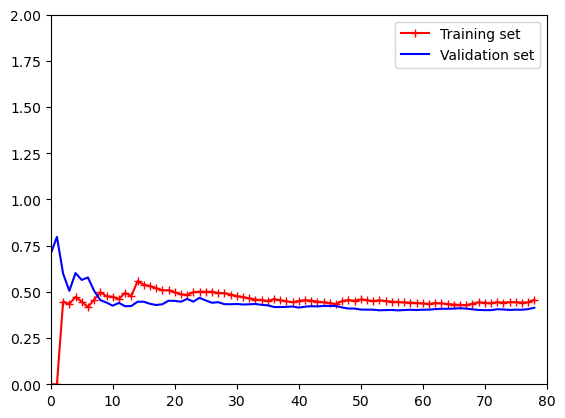

In [68]:
# Run the learning curve
reg_lin = LinearRegression()
learning_curves(reg_lin,x,y)

In [69]:
# Create a pipeline named regression_polinomial that performs both polynomial and linear regression
from sklearn.pipeline import Pipeline
regression_polinomial = Pipeline([
    ("Polynomial features",PolynomialFeatures(degree = 10, include_bias = False)),
    ("Linear Regression",LinearRegression())
])

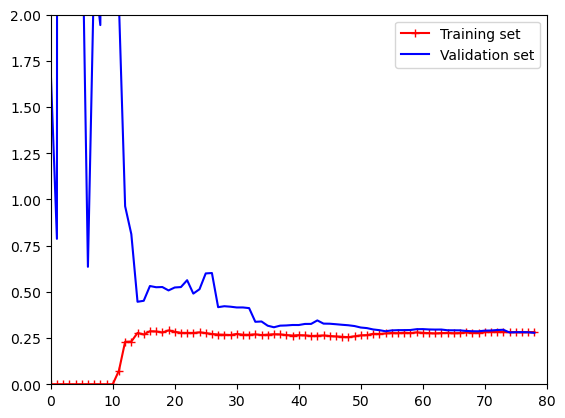

In [70]:
# Run learning curves on regression_polinomial
learning_curves(regression_polinomial,x,y)

In [71]:
# Vary the degree of the polynomial to improve the model's performance. For example: 2
from sklearn.pipeline import Pipeline

regression_polinomial = Pipeline([
    ("Polynomial features", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg_lin", LinearRegression())
])

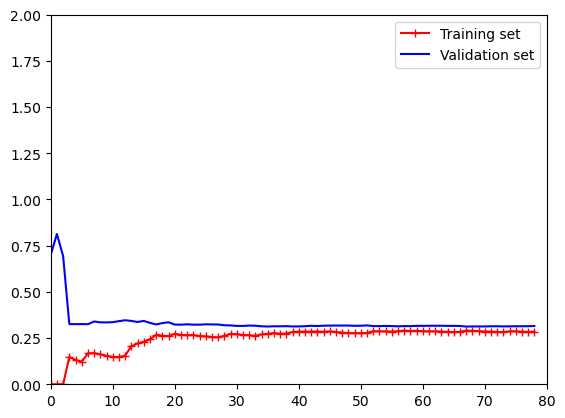

In [72]:
# Run the learning curve
learning_curves(regression_polinomial,x,y)

Generally, when the lines touch, it means you have reached a good model. It is neither overfitting nor underfitting

***

## <span style="color:green">5. Regularization of linear models</span>

### <span style="color:blue">5.1 Ridge Regression</span>

**Regularization term in Ridge Regression**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Cost function of Ridge Regression**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

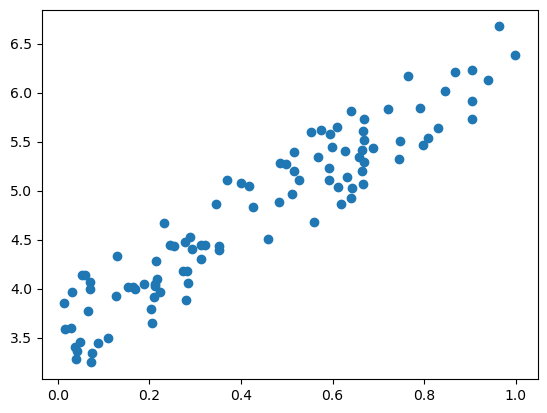

In [73]:
# Generate a toy dataset 
x = np.random.rand(100,1)
y = 3 + 3*x + np.random.rand(100,1)
plt.scatter(x,y)

In [74]:
# Perform a simple linear regression to compare with Ridge regression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

a0 = float(lin_reg.intercept_[0])
b0 = float(lin_reg.coef_[0][0])

print("Intercept:", a0)
print("Coefficient:", b0)

Intercept: 3.5358455928176404
Coefficient: 2.8577869743273423


In [75]:
# Generate 100 data points to plot the prediction line  
x_new = np.linspace(0,1,100)
y_new = a0 +b0 * x_new

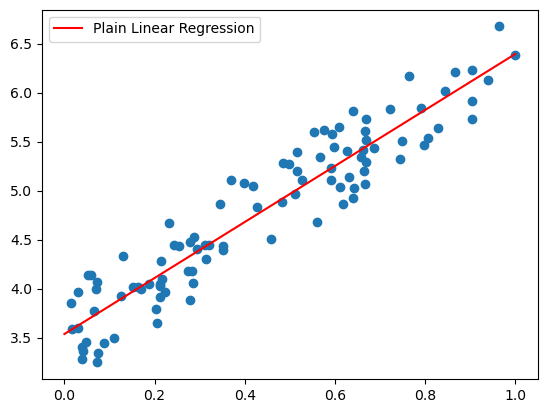

In [76]:
# Plot the prediction
plt.scatter(x,y)
plt.plot(x_new, y_new, "r-", label = "Plain Linear Regression")
plt.legend()
plt.show()

In [77]:
# Import Ridge to perform our Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x,y)

Ridge()

In [78]:
# Calculate the Ridge regression parameters
ridge.intercept_, ridge.coef_

a = float(ridge.intercept_[0])
b = float(ridge.coef_[0][0])

print("Intercept:", a)
print("Coefficient:", b)

Intercept: 3.6808459291195668
Coefficient: 2.520974651415252


In [79]:
# Create the Ridge prediction line
ridge.intercept_, ridge.coef_
x_cresta = np.linspace(0,1,100)
y_cresta = a + b*x_cresta

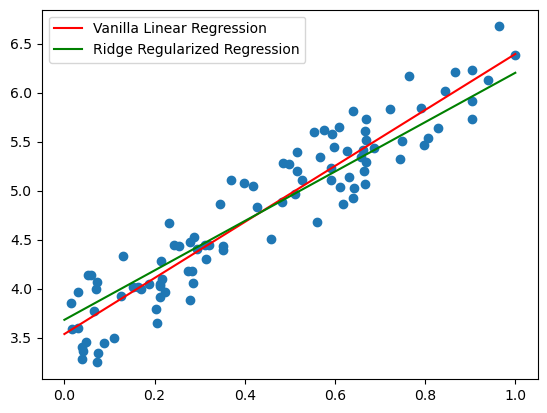

In [80]:
# Plot comparing linear regression and Ridge regression

plt.scatter(x,y)
plt.plot(x_new, y_new, "r-", label = "Vanilla Linear Regression")
plt.plot(x_cresta, y_cresta, "g-", label = "Ridge Regularized Regression")
plt.legend()
plt.show()

***

### <span style="color:blue">5.2 Lasso Regression</span>

**Cost function of Lasso Regression**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [81]:
# Import lasso
from sklearn.linear_model import Lasso
# Assign an alpha of 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(x,y)

Lasso(alpha=0.1)

In [82]:
# Calculate the intercept and coefficients of x 
lasso.intercept_,lasso.coef_

a1 = float(lasso.intercept_[0])
b1 = float(lasso.coef_[0])

print("Intercept:", a1)
print("Coefficient:", b1)

Intercept: 4.111021294090657
Coefficient: 1.5217468728411647


In [83]:
# Create the Lasso prediction line
x_lasso = np.linspace(0,1,100)
y_lasso = a1 + b1*x_lasso

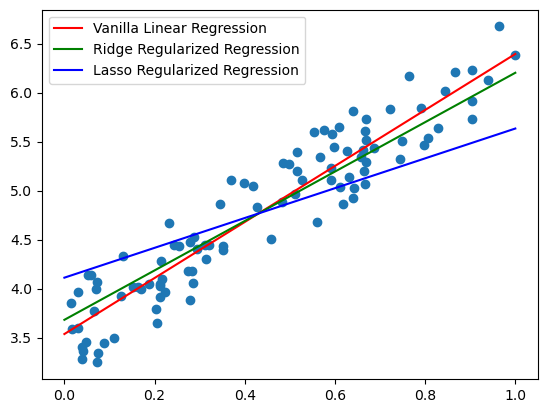

In [84]:
# Plot comparing linear regression, Ridge regression, and Lasso regression.
plt.scatter(x,y)
plt.plot(x_new, y_new, "r-", label = "Vanilla Linear Regression")
plt.plot(x_cresta, y_cresta, "g-", label = "Ridge Regularized Regression")
plt.plot(x_lasso, y_lasso, "b-", label = "Lasso Regularized Regression")
plt.legend()
plt.show()

***

### <span style="color:blue">5.3 Elastic Net Regression</span>

**Cost function of Elastic Net Regression**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [85]:
# Import ElasticNet
from sklearn.linear_model import ElasticNet
net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
net.fit(x,y)

ElasticNet(alpha=0.1)

In [86]:
# Calculate the intercept and coefficients of x
net.intercept_,net.coef_

a2 = float(net.intercept_[0])
b2 = float(net.coef_[0])

print("Intercept:", a2)
print("Coefficient:", b2)

Intercept: 4.2009770842922585
Coefficient: 1.3127941253516293


In [87]:
# Create the Lasso prediction line
x_net = np.linspace(0,1,100)
y_net = a2 + b2*x_net

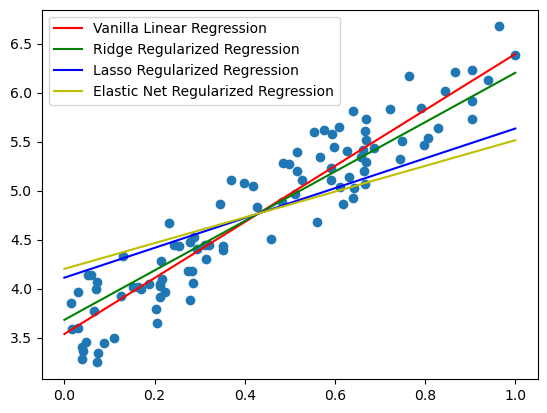

In [88]:
# Plot comparing linear regression, Ridge regression, Lasso regression, and Elastic Net regression.
plt.scatter(x,y)
plt.plot(x_new, y_new, "r-", label = "Vanilla Linear Regression")
plt.plot(x_cresta, y_cresta, "g-", label = "Ridge Regularized Regression")
plt.plot(x_lasso, y_lasso, "b-", label = "Lasso Regularized Regression")
plt.plot(x_net, y_net, "y-", label = "Elastic Net Regularized Regression")
plt.legend()
plt.show()

***

## <span style="color:green">6. Logistic Regression</span>

**Logistic Regression Model**

$ \hat{p} = L(b^Tx) $

**Logistic function**

$ L = \frac {1}{1+e^{-t}} $

**Logistic Regression Cost Function**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivative of Cost Functiono**

$ \frac{\partial}{\partial b} J(b) $

In [89]:
# Get the data set
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
# Display the dataset 
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**KEY:** 
gmat: IQ test
gpa: average in school

In [90]:
# Divide the dataset into predictor variables and the variable to predict.
x = df[["gmat","gpa","work_experience","admitted"]]
y = df[["admitted"]]

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y)

In [92]:
# Make predictions
y_pred = clf.predict(x)

In [93]:
# View y_pred
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [94]:
# Use the predict_proba function to visualize the probability of admission
y_proba = clf.predict_proba(x)

In [95]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no 
y_probano = [y_proba[i][1] for i in range(0,len(y_proba))]
y_probasi = [y_proba[i][0] for i in range(0,len(y_proba))]

In [96]:
# Generate a list to see the probability of being admitted and not admitted
df["predict"] = y_pred
df["probano"] = y_probano
df["probasi"] = y_probasi
df.head()

,gmat,gpa,work_experience,admitted,predict,probano,probasi
0,780,4.0,3,1,1,0.960614,0.039386
1,750,3.9,4,1,1,0.964777,0.035223
2,690,3.3,3,0,0,0.308998,0.691002
3,710,3.7,5,1,1,0.960170,0.039830
4,680,3.9,4,0,1,0.521003,0.478997


In [97]:
# Visualize the weight of work experience, GMAT score, and GPA
df.sort_values(by=["work_experience"])
df.sort_values(by=["gmat"])
df.sort_values(by=["gpa"])

,gmat,gpa,work_experience,admitted,predict,probano,probasi
38,590,1.7,4,0,0,0.054601,0.945399
9,690,1.7,1,0,0,0.039765,0.960235
21,600,2.0,1,0,0,0.009075,0.990925
19,590,2.3,3,0,0,0.037606,0.962394
22,550,2.3,4,0,0,0.037118,0.962882
6,690,2.3,1,0,0,0.055108,0.944892
27,580,2.3,2,0,0,0.015336,0.984664
35,650,2.3,1,0,0,0.026897,0.973103
10,610,2.7,3,0,0,0.066568,0.933432
31,620,2.7,2,0,0,0.039654,0.960346


In [98]:
# Evaluate the regression using metrics such as the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y)

array([[20,  1],
       [ 1, 18]], dtype=int64)

In [99]:
# Evaluate the regression using metrics such as f1_score
from sklearn.metrics import f1_score
f1_score(y_pred, y)

0.9473684210526315

## <span style="color:green">6. Regression Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [ ]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial")
clf.fit(x,y)
y_pred = clf.predict(x)

In [101]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)